#**Exploratory Data Analysis (EDA) Backup Dataset**
***Section:** B1* <br>
***Team:** 14* <br>
***Team Members:** Drishti Chulani, Arshdeep Singh Oberoi, Ahrar Karim, Vishesh Goyal* <br>
***Link to Colab Notebook:** [Click Here to Access the Colab Notebook](https://colab.research.google.com/drive/1H5f20DOXz4A_qzFyOtLbdqrMl2JZPwah?usp=sharing)* <br>
***Link to Github Repo:** [Click Here to Access the Github Repo](https://github.com/BackBencher2424/BA820_Team_14_Project)*

***Primary Dataset:** [ Bob Ross Paintings](https://github.com/rfordatascience/tidytuesday/tree/main/data/2023/2023-02-21)*

##**Step 1: Environment Setup and Data Loading**

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
# IMPORTANT: Update the path below to the actual location of your 'bob_ross.csv' file in Google Drive
df = pd.read_csv('/content/drive/MyDrive/bob_ross.csv')

# Display basic information
print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"Total Paintings: {len(df)}")
print(f"Total Features: {len(df.columns)}")
print(f"\nDataset Shape: {df.shape}")
print(f"\nColumn Names:\n{df.columns.tolist()}")

Mounted at /content/drive
DATASET OVERVIEW
Total Paintings: 403
Total Features: 27

Dataset Shape: (403, 27)

Column Names:
['painting_index', 'img_src', 'painting_title', 'season', 'episode', 'num_colors', 'youtube_src', 'colors', 'color_hex', 'Black_Gesso', 'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow', 'Dark_Sienna', 'Indian_Red', 'Indian_Yellow', 'Liquid_Black', 'Liquid_Clear', 'Midnight_Black', 'Phthalo_Blue', 'Phthalo_Green', 'Prussian_Blue', 'Sap_Green', 'Titanium_White', 'Van_Dyke_Brown', 'Yellow_Ochre', 'Alizarin_Crimson']


##**Step 2: Data Structure and Quality Assessment**

In [3]:
# Examine data types
print("\n" + "="*80)
print("DATA TYPES")
print("="*80)
print(df.dtypes)

# Check for missing values
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing_Count'] > 0])

# Check for duplicates
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

# Display first and last few rows
print("\n" + "="*80)
print("SAMPLE DATA (First 5 Rows)")
print("="*80)
print(df.head())

print("\n" + "="*80)
print("SAMPLE DATA (Last 5 Rows)")
print("="*80)
print(df.tail())



DATA TYPES
painting_index       int64
img_src             object
painting_title      object
season               int64
episode              int64
num_colors           int64
youtube_src         object
colors              object
color_hex           object
Black_Gesso           bool
Bright_Red            bool
Burnt_Umber           bool
Cadmium_Yellow        bool
Dark_Sienna           bool
Indian_Red            bool
Indian_Yellow         bool
Liquid_Black          bool
Liquid_Clear          bool
Midnight_Black        bool
Phthalo_Blue          bool
Phthalo_Green         bool
Prussian_Blue         bool
Sap_Green             bool
Titanium_White        bool
Van_Dyke_Brown        bool
Yellow_Ochre          bool
Alizarin_Crimson      bool
dtype: object

MISSING VALUES ANALYSIS
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []

Duplicate Rows: 0

SAMPLE DATA (First 5 Rows)
   painting_index                                            img_src  \
0             282  https://www.twoinch

##**Step 3: Temporal Structure Analysis**

In [4]:
# Analyze season and episode structure
print("\n" + "="*80)
print("TEMPORAL STRUCTURE ANALYSIS")
print("="*80)

print(f"Total Seasons: {df['season'].nunique()}")
print(f"Season Range: {df['season'].min()} to {df['season'].max()}")
print(f"\nEpisodes per Season:")
print(df.groupby('season')['episode'].agg(['min', 'max', 'count']))

# Check if any seasons have irregular episode counts
season_counts = df.groupby('season').size()
print(f"\nSeasons with non-standard episode count:")
print(season_counts[season_counts != 13])

# Create a chronological index
df['chronological_order'] = (df['season'] - 1) * 13 + df['episode']
print(f"\nChronological painting range: {df['chronological_order'].min()} to {df['chronological_order'].max()}")



TEMPORAL STRUCTURE ANALYSIS
Total Seasons: 31
Season Range: 1 to 31

Episodes per Season:
        min  max  count
season                 
1         1   13     13
2         1   13     13
3         1   13     13
4         1   13     13
5         1   13     13
6         1   13     13
7         1   13     13
8         1   13     13
9         1   13     13
10        1   13     13
11        1   13     13
12        1   13     13
13        1   13     13
14        1   13     13
15        1   13     13
16        1   13     13
17        1   13     13
18        1   13     13
19        1   13     13
20        1   13     13
21        1   13     13
22        1   13     13
23        1   13     13
24        1   13     13
25        1   13     13
26        1   13     13
27        1   13     13
28        1   13     13
29        1   13     13
30        1   13     13
31        1   13     13

Seasons with non-standard episode count:
Series([], dtype: int64)

Chronological painting range: 1 to 403


##**Step 4: Color Usage Analysis**

In [5]:
# Extract color columns (boolean columns)
color_columns = [col for col in df.columns if col not in ['painting_index', 'img_src',
                'painting_title', 'season', 'episode', 'num_colors', 'youtube_src',
                'colors', 'color_hex', 'chronological_order']]

print("\n" + "="*80)
print("COLOR USAGE ANALYSIS")
print("="*80)
print(f"Total Available Colors: {len(color_columns)}")
print(f"Color Names:\n{color_columns}")

# Calculate usage frequency for each color
color_usage = df[color_columns].sum().sort_values(ascending=False)
color_usage_pct = (color_usage / len(df)) * 100

color_summary = pd.DataFrame({
    'Paintings_Used': color_usage,
    'Usage_Percentage': color_usage_pct
})

print("\n" + "="*80)
print("COLOR FREQUENCY TABLE")
print("="*80)
print(color_summary)

# Analyze num_colors distribution
print("\n" + "="*80)
print("NUMBER OF COLORS PER PAINTING")
print("="*80)
print(df['num_colors'].describe())
print(f"\nValue Counts:")
print(df['num_colors'].value_counts().sort_index())



COLOR USAGE ANALYSIS
Total Available Colors: 18
Color Names:
['Black_Gesso', 'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow', 'Dark_Sienna', 'Indian_Red', 'Indian_Yellow', 'Liquid_Black', 'Liquid_Clear', 'Midnight_Black', 'Phthalo_Blue', 'Phthalo_Green', 'Prussian_Blue', 'Sap_Green', 'Titanium_White', 'Van_Dyke_Brown', 'Yellow_Ochre', 'Alizarin_Crimson']

COLOR FREQUENCY TABLE
                  Paintings_Used  Usage_Percentage
Titanium_White               400         99.255583
Alizarin_Crimson             380         94.292804
Van_Dyke_Brown               371         92.059553
Cadmium_Yellow               346         85.856079
Yellow_Ochre                 327         81.141439
Phthalo_Blue                 323         80.148883
Bright_Red                   321         79.652605
Midnight_Black               317         78.660050
Sap_Green                    306         75.930521
Indian_Yellow                292         72.456576
Dark_Sienna                  290         71.960298
Prussian_

##**Step 5: Univariate Visualizations**

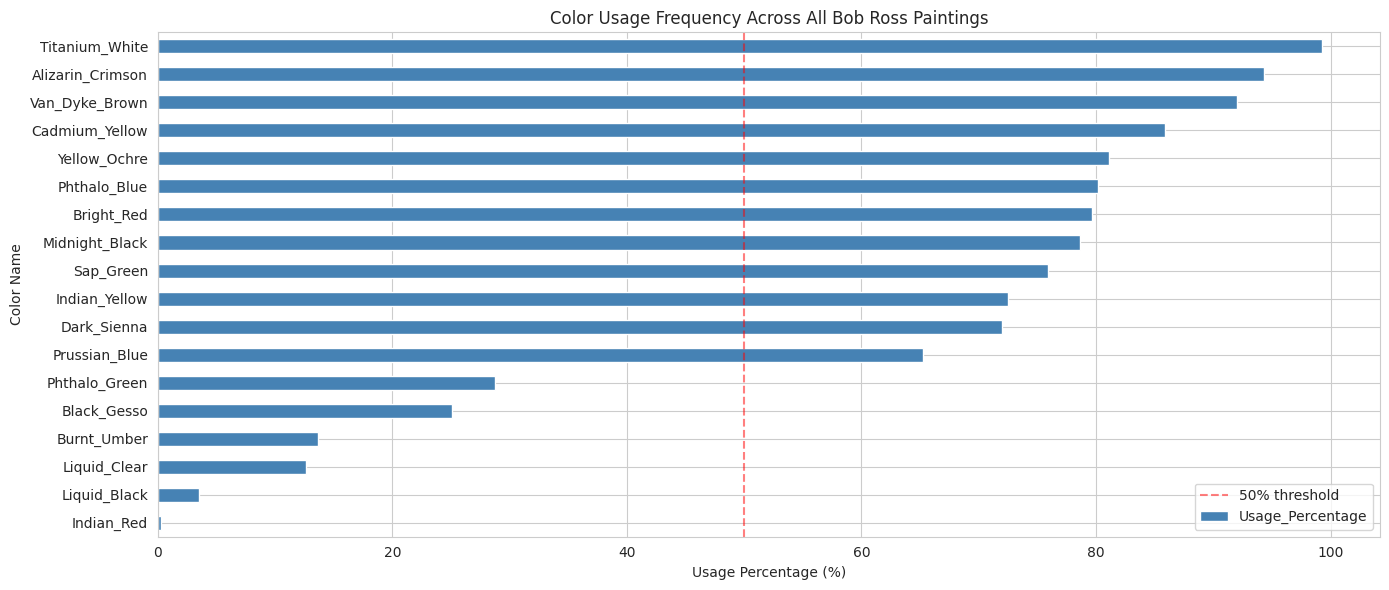

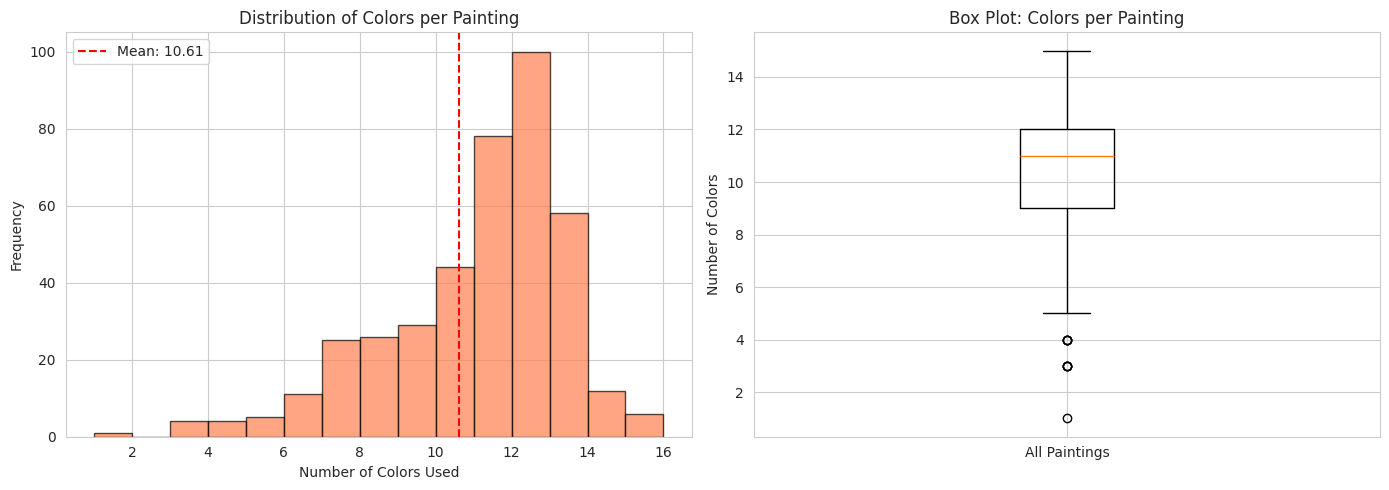

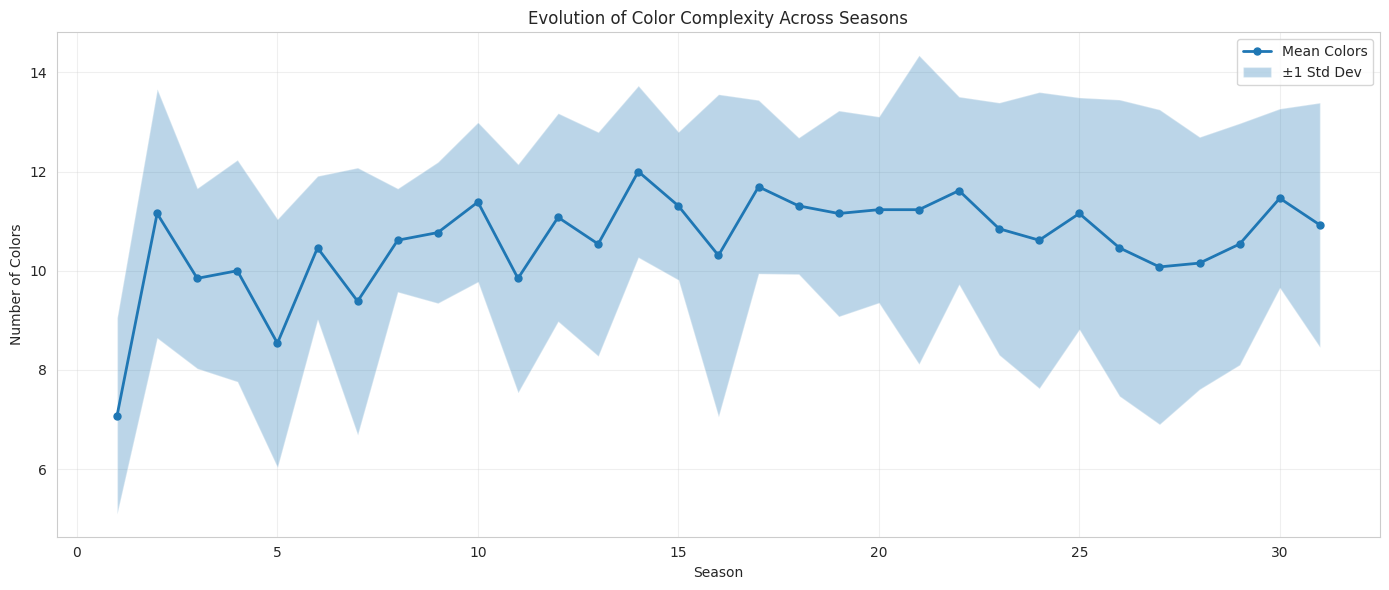

In [6]:
# Visualization 1: Color usage frequency bar plot
fig, ax = plt.subplots(figsize=(14, 6))
color_summary.sort_values('Usage_Percentage', ascending=True).plot(
    kind='barh',
    y='Usage_Percentage',
    ax=ax,
    color='steelblue',
    legend=False
)
ax.set_xlabel('Usage Percentage (%)')
ax.set_ylabel('Color Name')
ax.set_title('Color Usage Frequency Across All Bob Ross Paintings')
ax.axvline(50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Visualization 2: Distribution of colors per painting
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['num_colors'], bins=range(df['num_colors'].min(),
             df['num_colors'].max()+2), color='coral', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Colors Used')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Colors per Painting')
axes[0].axvline(df['num_colors'].mean(), color='red', linestyle='--',
                label=f'Mean: {df["num_colors"].mean():.2f}')
axes[0].legend()

# Box plot
axes[1].boxplot(df['num_colors'], vert=True)
axes[1].set_ylabel('Number of Colors')
axes[1].set_title('Box Plot: Colors per Painting')
axes[1].set_xticklabels(['All Paintings'])

plt.tight_layout()
plt.show()

# Visualization 3: Temporal trend - colors over seasons
season_color_trend = df.groupby('season')['num_colors'].agg(['mean', 'std', 'min', 'max'])

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(season_color_trend.index, season_color_trend['mean'],
        marker='o', linewidth=2, markersize=5, label='Mean Colors')
ax.fill_between(season_color_trend.index,
                season_color_trend['mean'] - season_color_trend['std'],
                season_color_trend['mean'] + season_color_trend['std'],
                alpha=0.3, label='±1 Std Dev')
ax.set_xlabel('Season')
ax.set_ylabel('Number of Colors')
ax.set_title('Evolution of Color Complexity Across Seasons')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


##**Step 6: Bivariate and Correlation Analysis**


COLOR CO-OCCURRENCE CORRELATION MATRIX


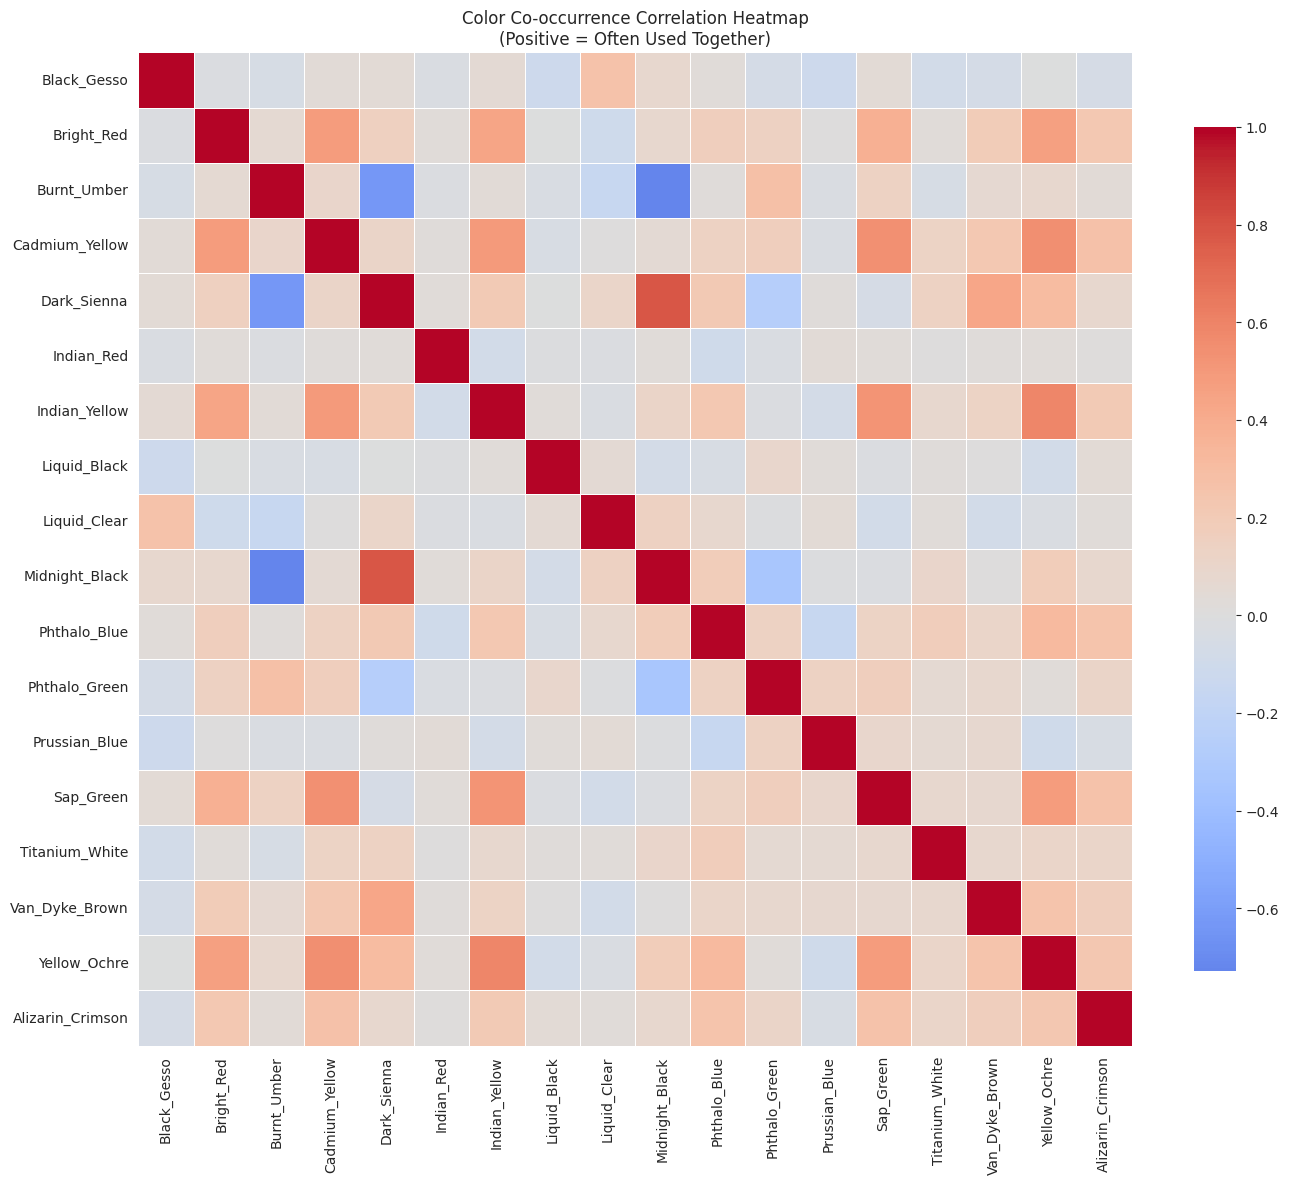


Top 10 Color Pairs (Most Frequently Used Together):
            Color_1         Color_2  Correlation
66      Dark_Sienna  Midnight_Black     0.780478
96    Indian_Yellow    Yellow_Ochre     0.583129
60   Cadmium_Yellow    Yellow_Ochre     0.550660
57   Cadmium_Yellow       Sap_Green     0.537677
93    Indian_Yellow       Sap_Green     0.523391
50   Cadmium_Yellow   Indian_Yellow     0.498913
145       Sap_Green    Yellow_Ochre     0.485312
18       Bright_Red  Cadmium_Yellow     0.484677
31       Bright_Red    Yellow_Ochre     0.465389
21       Bright_Red   Indian_Yellow     0.433432

Top 10 Color Pairs (Least Frequently Used Together):
            Color_1         Color_2  Correlation
79       Indian_Red    Phthalo_Blue    -0.100217
23       Bright_Red    Liquid_Clear    -0.104242
11      Black_Gesso   Prussian_Blue    -0.107184
6       Black_Gesso    Liquid_Black    -0.109710
38      Burnt_Umber    Liquid_Clear    -0.151323
126    Phthalo_Blue   Prussian_Blue    -0.154059
68      Dar

In [7]:
# Create a color usage matrix
color_matrix = df[color_columns].astype(int)

# Calculate correlation matrix for color co-occurrence
print("\n" + "="*80)
print("COLOR CO-OCCURRENCE CORRELATION MATRIX")
print("="*80)
color_corr = color_matrix.corr()

# Visualization 4: Correlation heatmap
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(color_corr, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
ax.set_title('Color Co-occurrence Correlation Heatmap\n(Positive = Often Used Together)')
plt.tight_layout()
plt.show()

# Identify strongest positive and negative correlations
corr_pairs = []
for i in range(len(color_corr.columns)):
    for j in range(i+1, len(color_corr.columns)):
        corr_pairs.append({
            'Color_1': color_corr.columns[i],
            'Color_2': color_corr.columns[j],
            'Correlation': color_corr.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs).sort_values('Correlation', ascending=False)

print("\nTop 10 Color Pairs (Most Frequently Used Together):")
print(corr_df.head(10))

print("\nTop 10 Color Pairs (Least Frequently Used Together):")
print(corr_df.tail(10))


##**Step 7: Multivariate Pattern Analysis**

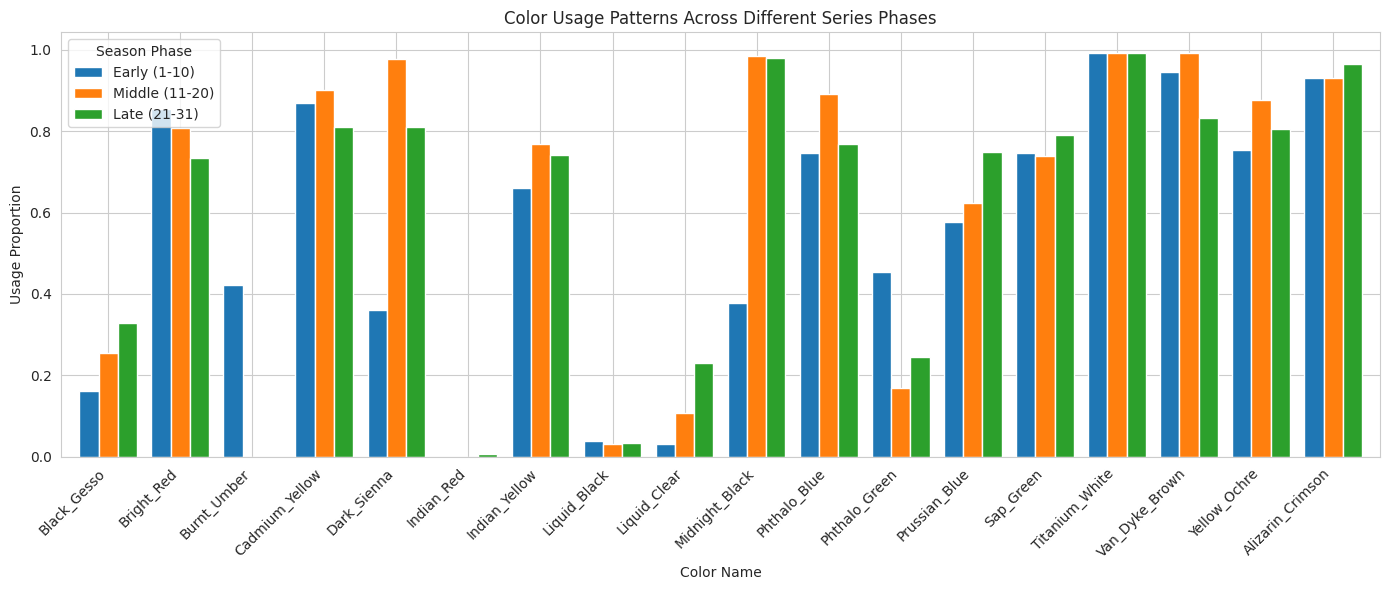


OUTLIER ANALYSIS: Unusual Color Usage

Minimalist Paintings (≤3 colors): 5
     season  episode      painting_title  num_colors  \
3         1        4         Winter Mist           3   
16        2        4      Shades of Grey           3   
88        7       11         Grey Winter           3   
200      16        6  Contemplative Lady           1   
269      21       10         Blue Winter           3   

                                                colors  
3    ['Prussian Blue', 'Titanium White', 'Van Dyke ...  
16   ['Prussian Blue', 'Titanium White', 'Van Dyke ...  
88   ['Alizarin Crimson', 'Midnight Black\r\n\r\n',...  
200                                 ['Van Dyke Brown']  
269  ['Midnight Black\r\n\r\n', 'Prussian Blue', 'T...  

Complex Paintings (≥14 colors): 18
     season  episode          painting_title  num_colors  \
175      14        7             Windy Waves          14   
214      17        7   Spectacular Waterfall          15   
235      19        2     Quie

In [8]:
# Visualization 5: Color usage patterns by season phase
df['season_phase'] = pd.cut(df['season'], bins=[0, 10, 20, 31],
                             labels=['Early (1-10)', 'Middle (11-20)', 'Late (21-31)'])

phase_colors = df.groupby('season_phase')[color_columns].mean()

fig, ax = plt.subplots(figsize=(14, 6))
phase_colors.T.plot(kind='bar', ax=ax, width=0.8)
ax.set_xlabel('Color Name')
ax.set_ylabel('Usage Proportion')
ax.set_title('Color Usage Patterns Across Different Series Phases')
ax.legend(title='Season Phase')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identify paintings with unusual color counts
print("\n" + "="*80)
print("OUTLIER ANALYSIS: Unusual Color Usage")
print("="*80)

# Paintings with very few colors (minimalist)
minimalist = df[df['num_colors'] <= 3][['season', 'episode', 'painting_title', 'num_colors', 'colors']]
print(f"\nMinimalist Paintings (≤3 colors): {len(minimalist)}")
print(minimalist)

# Paintings with very many colors (complex)
complex_paintings = df[df['num_colors'] >= 14][['season', 'episode', 'painting_title', 'num_colors', 'colors']]
print(f"\nComplex Paintings (≥14 colors): {len(complex_paintings)}")
print(complex_paintings)


##**Step 8: Dimensionality and Clustering Preparation**

In [9]:
# Prepare data for unsupervised learning
# Create feature matrix from color usage
X_colors = df[color_columns].astype(int).values

# Add numerical features
X_full = np.column_stack([
    X_colors,
    df['num_colors'].values,
    df['season'].values,
    df['episode'].values
])

feature_names = color_columns + ['num_colors', 'season', 'episode']

print("\n" + "="*80)
print("FEATURE MATRIX FOR UNSUPERVISED LEARNING")
print("="*80)
print(f"Feature Matrix Shape: {X_full.shape}")
print(f"Features: {len(feature_names)}")

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

print(f"Scaled Feature Matrix Shape: {X_scaled.shape}")
print(f"\nFeature Statistics (Original):")
print(pd.DataFrame(X_full, columns=feature_names).describe())



FEATURE MATRIX FOR UNSUPERVISED LEARNING
Feature Matrix Shape: (403, 21)
Features: 21
Scaled Feature Matrix Shape: (403, 21)

Feature Statistics (Original):
       Black_Gesso  Bright_Red  Burnt_Umber  Cadmium_Yellow  Dark_Sienna  \
count   403.000000  403.000000   403.000000      403.000000   403.000000   
mean      0.250620    0.796526     0.136476        0.858561     0.719603   
std       0.433909    0.403082     0.343720        0.348907     0.449752   
min       0.000000    0.000000     0.000000        0.000000     0.000000   
25%       0.000000    1.000000     0.000000        1.000000     0.000000   
50%       0.000000    1.000000     0.000000        1.000000     1.000000   
75%       0.500000    1.000000     0.000000        1.000000     1.000000   
max       1.000000    1.000000     1.000000        1.000000     1.000000   

       Indian_Red  Indian_Yellow  Liquid_Black  Liquid_Clear  Midnight_Black  \
count  403.000000     403.000000    403.000000    403.000000      403.000000 

##**Step 9: Advanced Pattern Discovery**


PALETTE DIVERSITY ANALYSIS
Palette Entropy Statistics:
count    403.000000
mean       2.326683
std        0.293648
min        0.000000
25%        2.197225
50%        2.397895
75%        2.484907
max        2.708050
Name: palette_entropy, dtype: float64


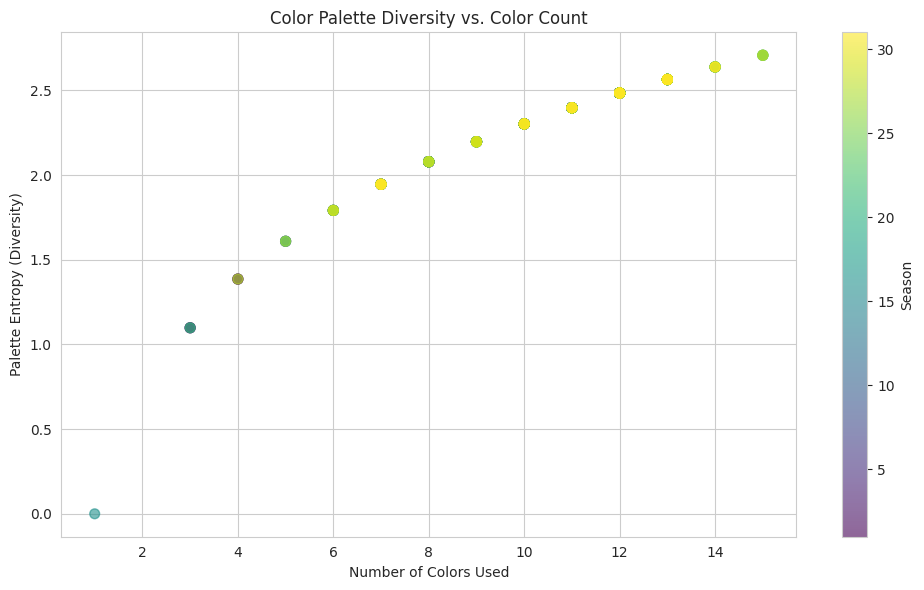


Most Diverse Palettes (Highest Entropy):
     season  episode          painting_title  num_colors  palette_entropy
214      17        7   Spectacular Waterfall          15         2.708050
293      23        8        Valley Waterfall          15         2.708050
306      24        8      Graceful Waterfall          15         2.708050
328      26        4      Lake in the Valley          15         2.708050
339      27        2          Angler's Haven          15         2.708050
341      27        4        Wilderness Falls          15         2.708050
175      14        7             Windy Waves          14         2.639057
235      19        2     Quiet Mountain Lake          14         2.639057
239      19        6  Waterfall in the Woods          14         2.639057
262      21        3           Royal Majesty          14         2.639057

Least Diverse Palettes (Lowest Entropy):
     season  episode      painting_title  num_colors  palette_entropy
200      16        6  Contemplat

In [10]:
# Analyze color palette diversity using Shannon entropy
from scipy.stats import entropy

def calculate_palette_entropy(row):
    """Calculate Shannon entropy of color usage in a painting"""
    colors_used = row[color_columns].values.astype(int)
    if colors_used.sum() == 0:
        return 0
    probs = colors_used / colors_used.sum()
    return entropy(probs[probs > 0])

df['palette_entropy'] = df.apply(calculate_palette_entropy, axis=1)

print("\n" + "="*80)
print("PALETTE DIVERSITY ANALYSIS")
print("="*80)
print(f"Palette Entropy Statistics:")
print(df['palette_entropy'].describe())

# Visualization 6: Entropy vs. Number of Colors
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(df['num_colors'], df['palette_entropy'],
                     c=df['season'], cmap='viridis', alpha=0.6, s=50)
ax.set_xlabel('Number of Colors Used')
ax.set_ylabel('Palette Entropy (Diversity)')
ax.set_title('Color Palette Diversity vs. Color Count')
plt.colorbar(scatter, label='Season', ax=ax)
plt.tight_layout()
plt.show()

# Identify most and least diverse paintings
print("\nMost Diverse Palettes (Highest Entropy):")
print(df.nlargest(10, 'palette_entropy')[['season', 'episode', 'painting_title',
                                           'num_colors', 'palette_entropy']])

print("\nLeast Diverse Palettes (Lowest Entropy):")
print(df.nsmallest(10, 'palette_entropy')[['season', 'episode', 'painting_title',
                                            'num_colors', 'palette_entropy']])


##****Step 1: Environment Setup and Data Loading****

In [12]:
# Create comprehensive summary for report
summary_stats = {
    'Total_Paintings': len(df),
    'Total_Seasons': df['season'].nunique(),
    'Available_Colors': len(color_columns),
    'Avg_Colors_Per_Painting': df['num_colors'].mean(),
    'Std_Colors_Per_Painting': df['num_colors'].std(),
    'Min_Colors': df['num_colors'].min(),
    'Max_Colors': df['num_colors'].max(),
    'Most_Common_Color': color_usage.idxmax(),
    'Most_Common_Color_Usage_Pct': color_usage_pct.max(),
    'Least_Common_Color': color_usage.idxmin(),
    'Least_Common_Color_Usage_Pct': color_usage_pct.min()
}

summary_df = pd.DataFrame([summary_stats]).T
summary_df.columns = ['Value']

print("\n" + "="*80)
print("FINAL SUMMARY STATISTICS")
print("="*80)
print(summary_df)

# Save processed data for modeling
df.to_csv('bob_ross_processed.csv', index=False)


FINAL SUMMARY STATISTICS
                                       Value
Total_Paintings                          403
Total_Seasons                             31
Available_Colors                          18
Avg_Colors_Per_Painting            10.605459
Std_Colors_Per_Painting             2.378525
Min_Colors                                 1
Max_Colors                                15
Most_Common_Color             Titanium_White
Most_Common_Color_Usage_Pct        99.255583
Least_Common_Color                Indian_Red
Least_Common_Color_Usage_Pct        0.248139
